<Axes: xlabel='residual sugar', ylabel='pH'>

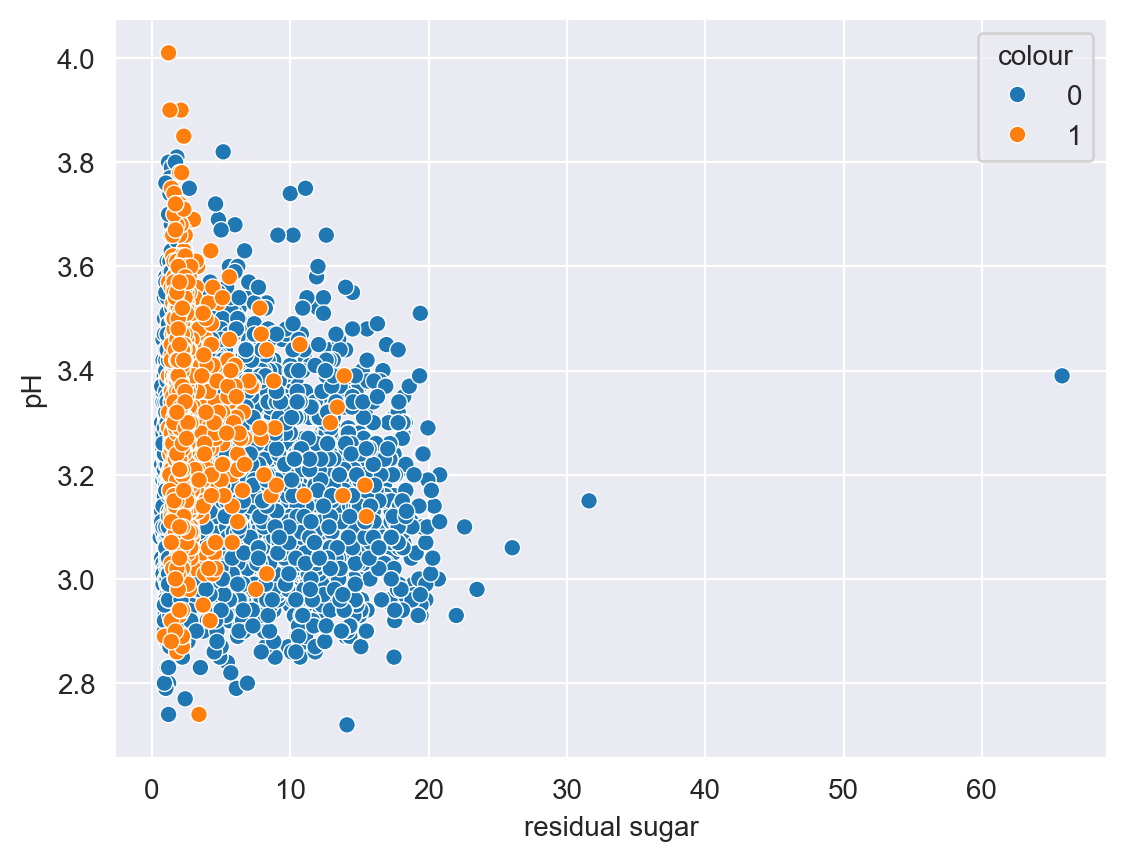

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

wine_data_all = pd.read_csv("winequality-all.csv")

wine_data_all.head()

'''
Units for columns:
Fixed acidity (g(tararic acid) / dm^3)
Volatile acidity (g(acetic acid) / dm^3)
Citric acid (g / dm^3)
Residual sugar (g / dm^3)
Chlorides (g(sodium chloride)/dm^3)
Free sulfur dioxide (mg / dm^3)
Total sulfur dioxide (mg / dm^3)
Density (g / cm^3)
pH (dimensionless)
Sulphates (g(KSO_4) / dm^3)
Alcohol (vol.%)
Quality (subjective score between 0 and 10, 10 being the best and 0 being the worst)
Colour (Dummy variable where 1 is red and 0 is white
'''

wine_data_all.groupby('colour').describe()
def filter_drop_column(df : pd.DataFrame,condition: bool, column: str) -> pd.DataFrame:
    filtered_df = df[condition]
    return filtered_df.drop(column, axis=1)

sns.scatterplot(data=wine_data_all,x="residual sugar",y="pH", hue="colour")



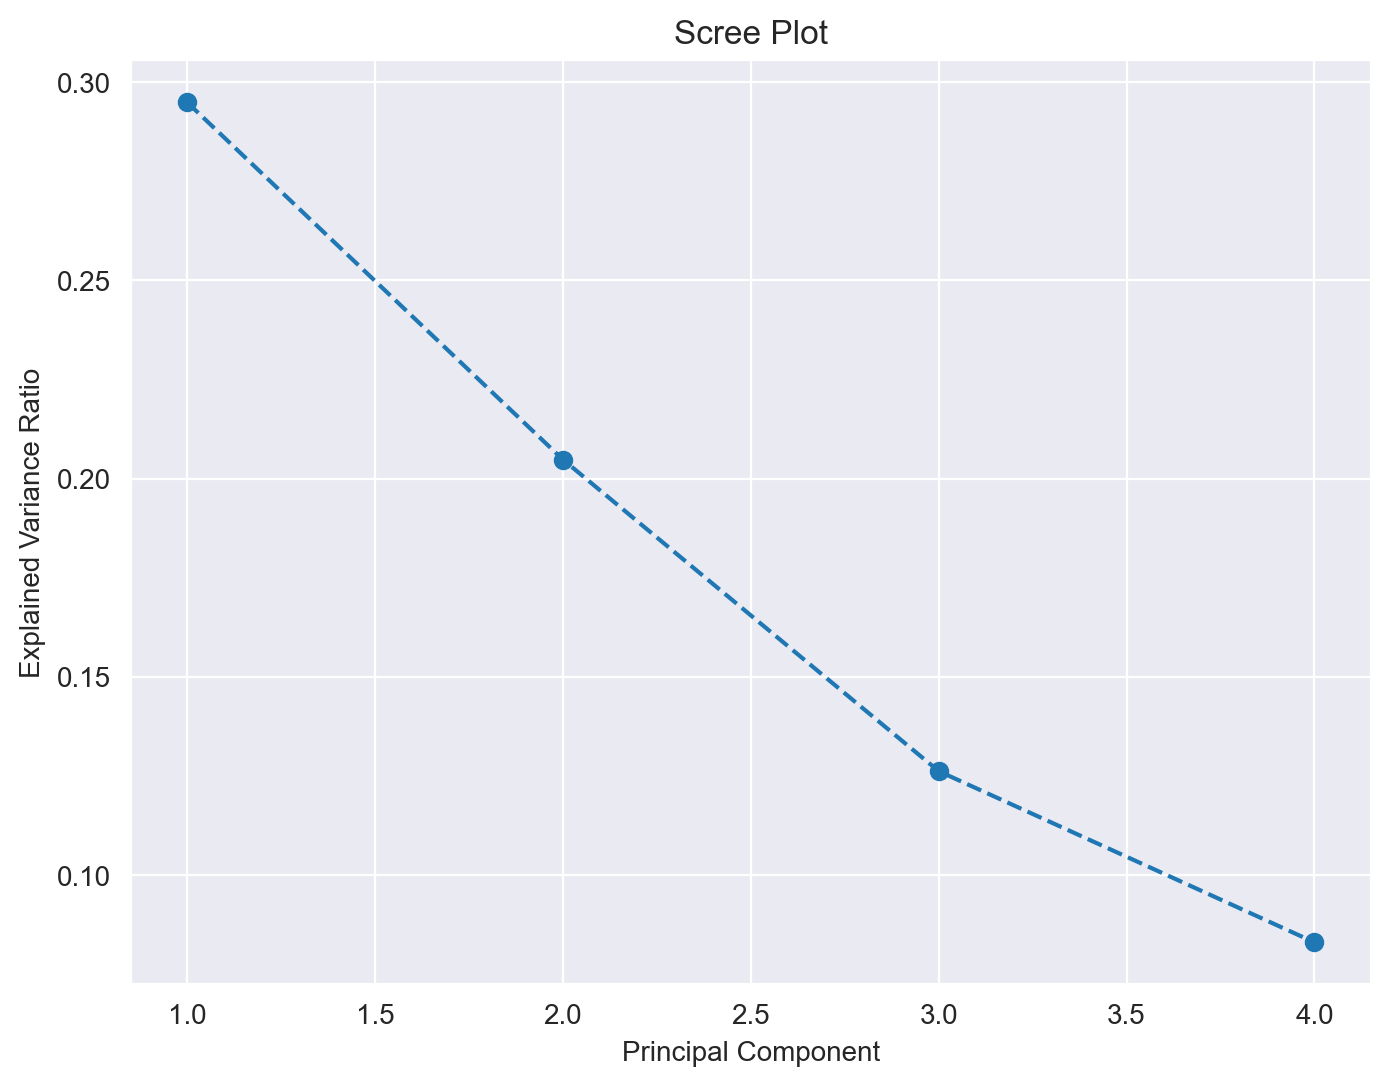

array([0.29492412, 0.20484445, 0.12627433, 0.08311596])

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA(n_components=4)
scaler = StandardScaler()
pipeline = make_pipeline(scaler,pca)
fit = pipeline.fit(wine_data_all)
explained_variance = pca.explained_variance_ratio_

# Create the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

loadings = pca.components_.T

# Create a DataFrame with labeled columns
num_components = loadings.shape[1]  # Number of PCA components

# Create a DataFrame with columns labeled as "PCA 1," "PCA 2," ...
pca_columns = [f'PCA {i + 1}' for i in range(num_components)]
pca_df = pd.DataFrame(loadings, columns=pca_columns)

# Add the corresponding feature names as row labels if needed
pca_df.index = wine_data_all.columns

# Display the PCA component loadings
pca_df

pca.explained_variance_ratio_

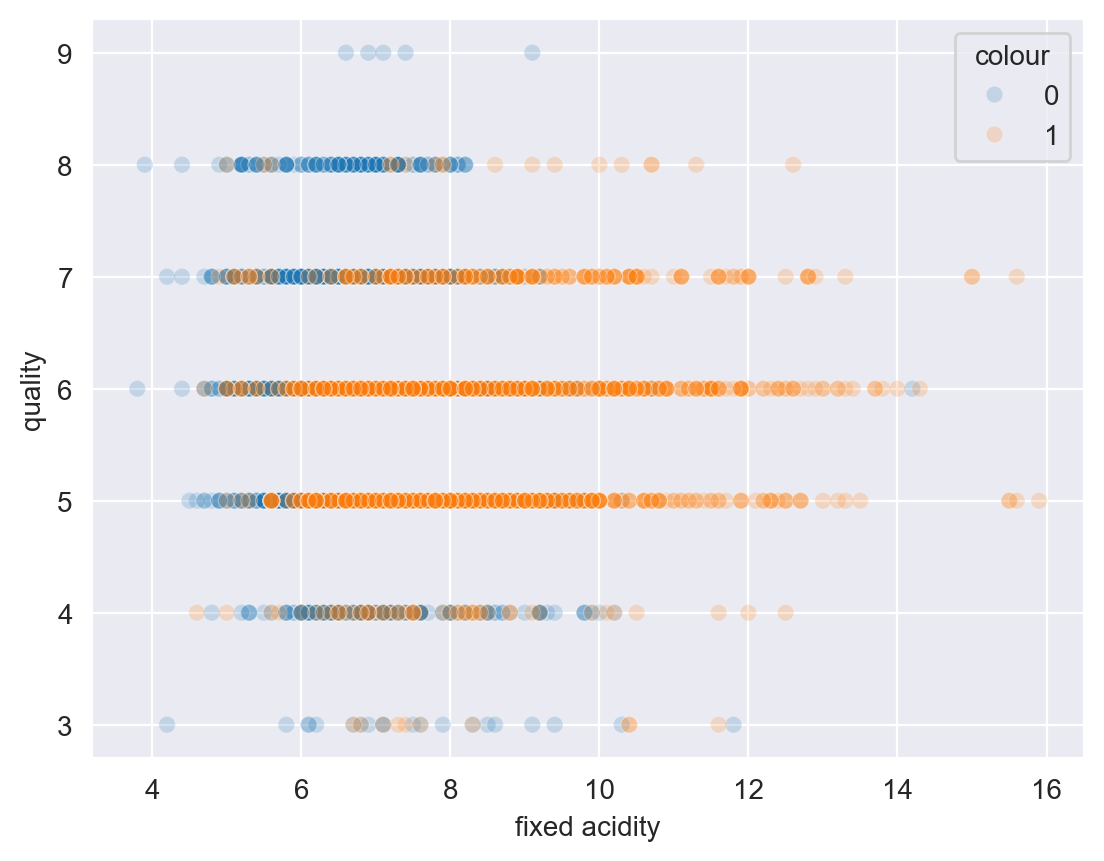

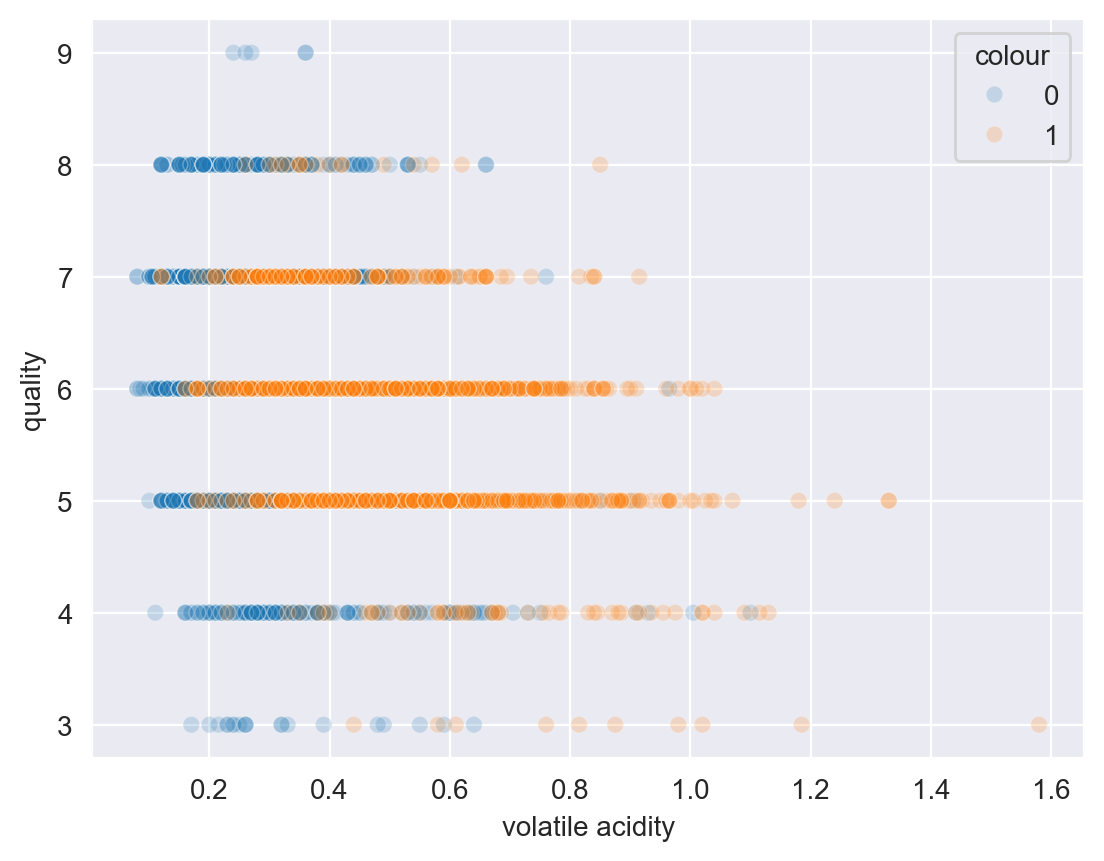

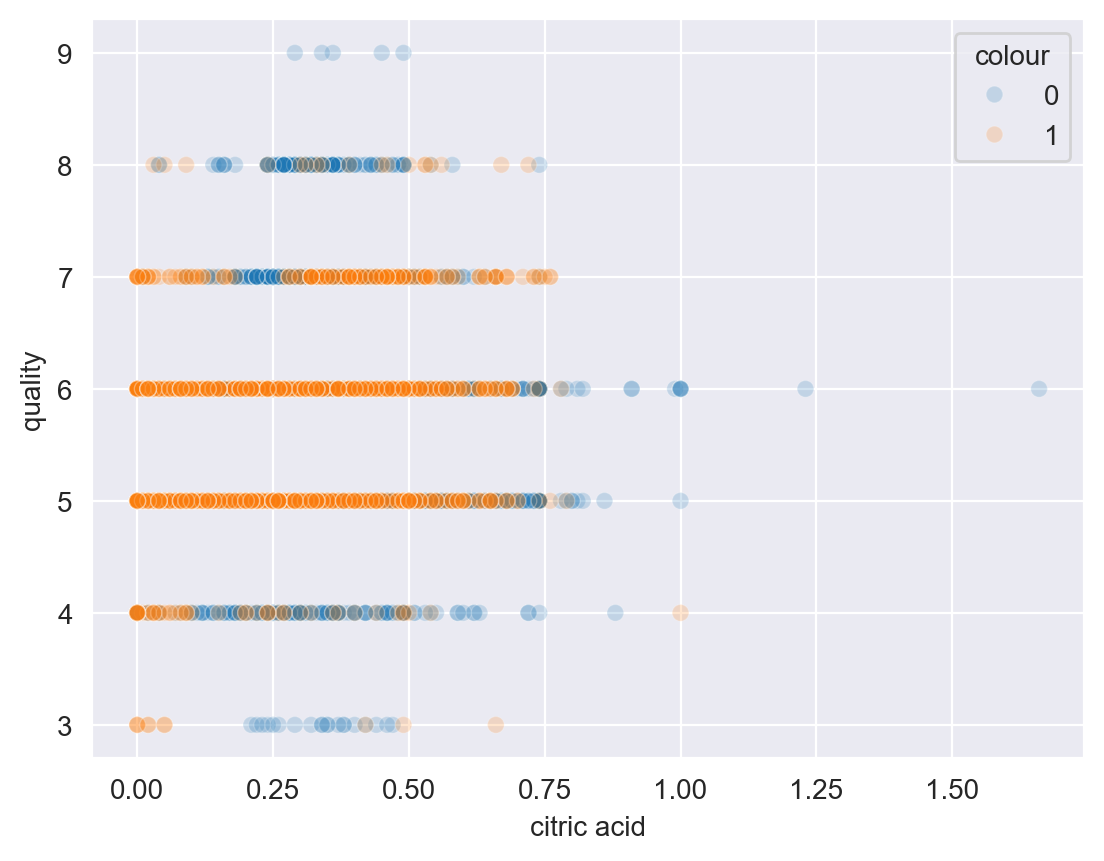

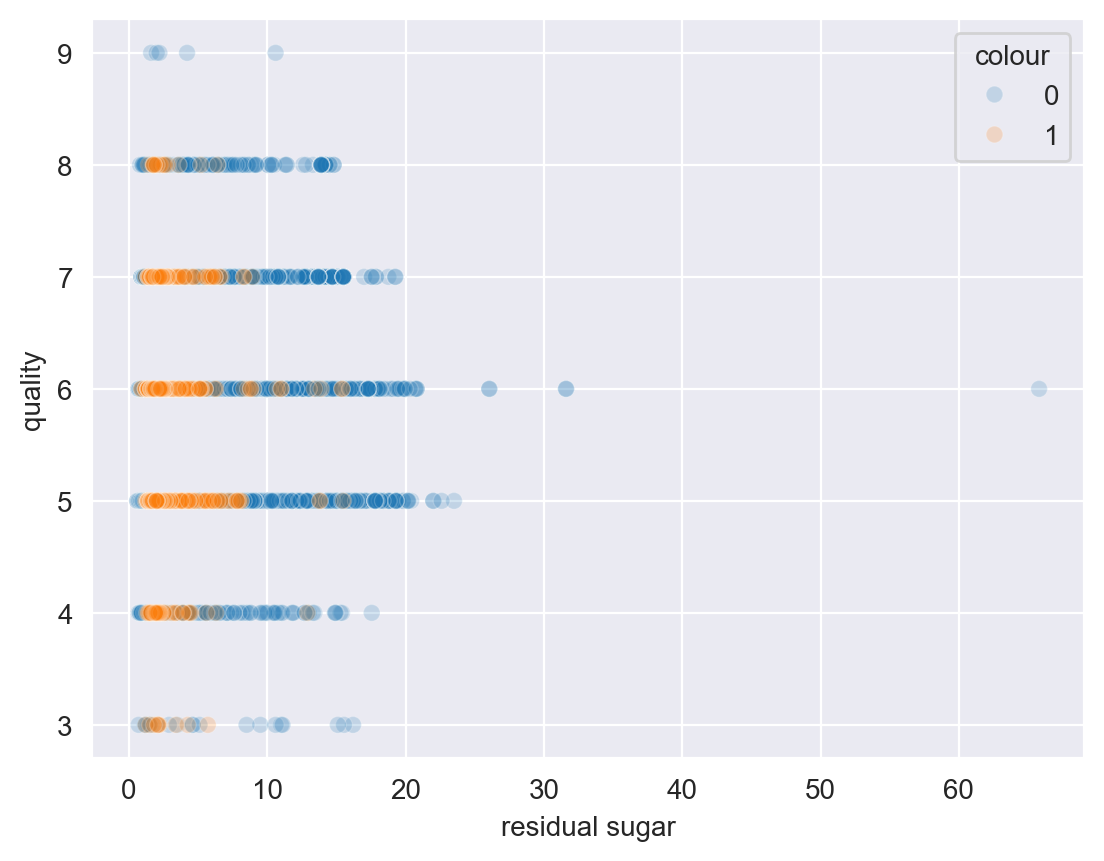

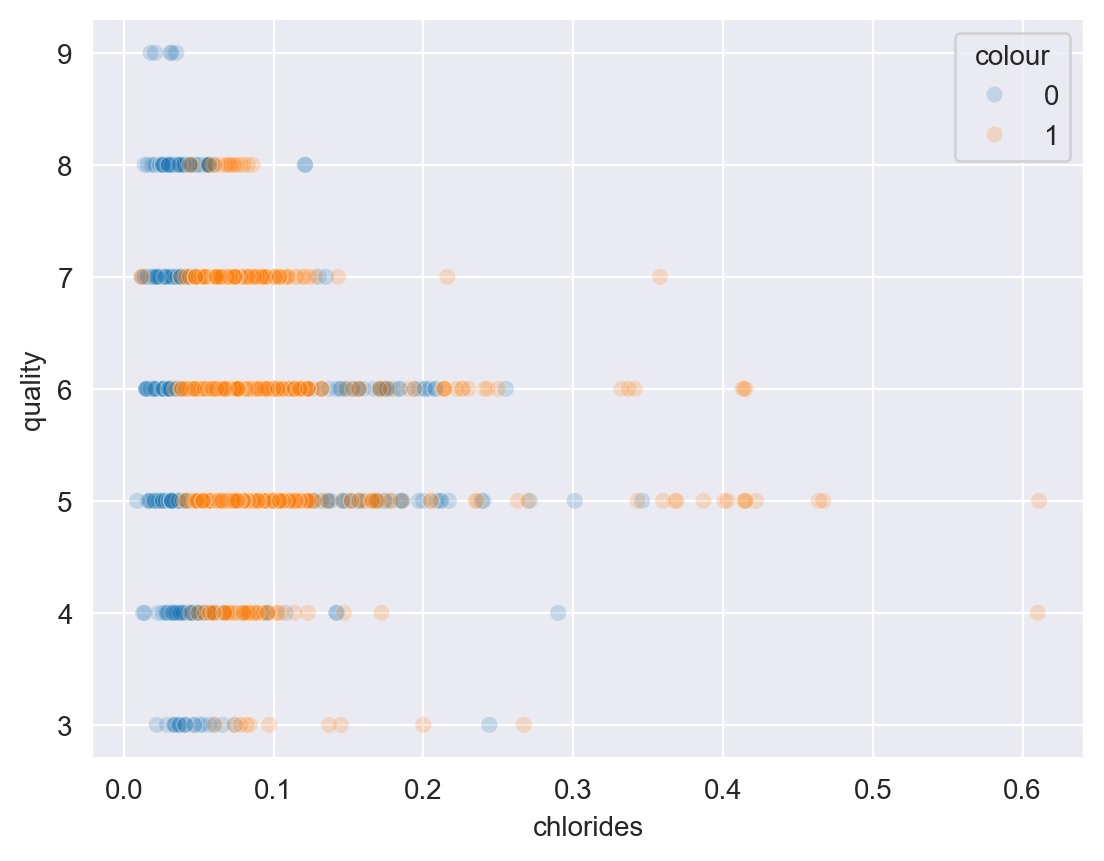

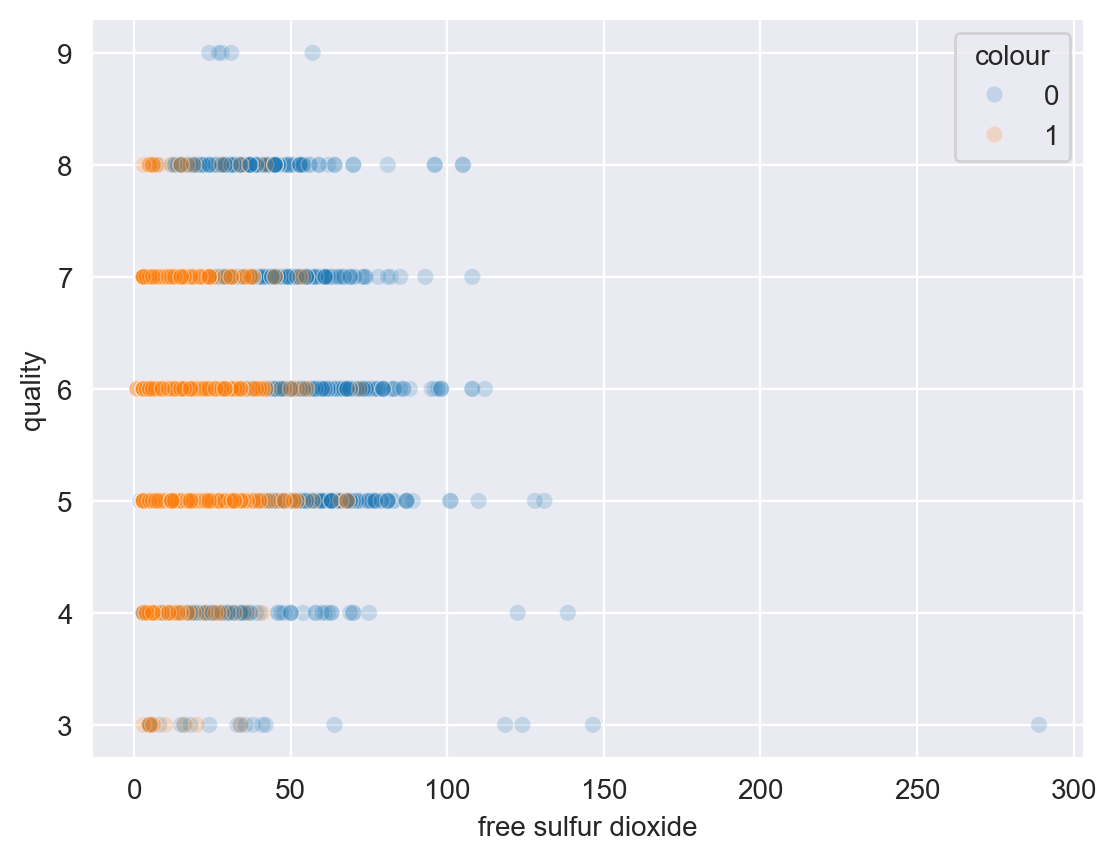

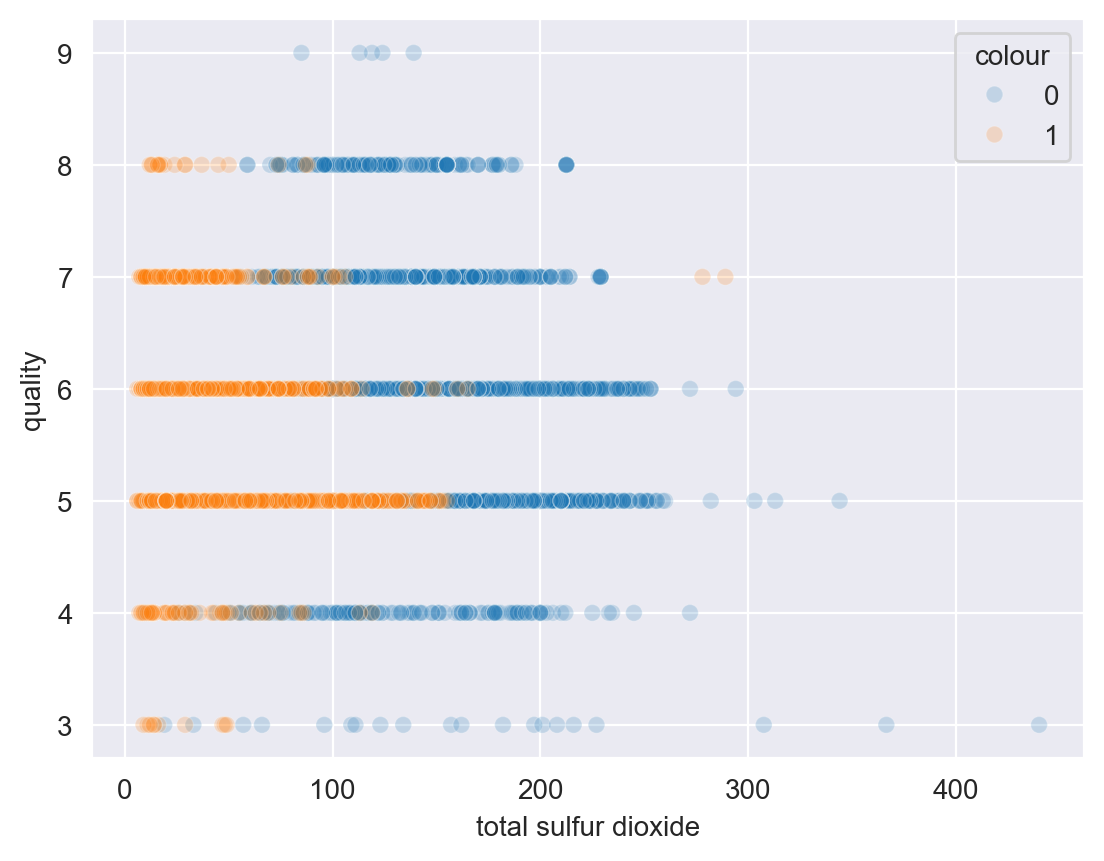

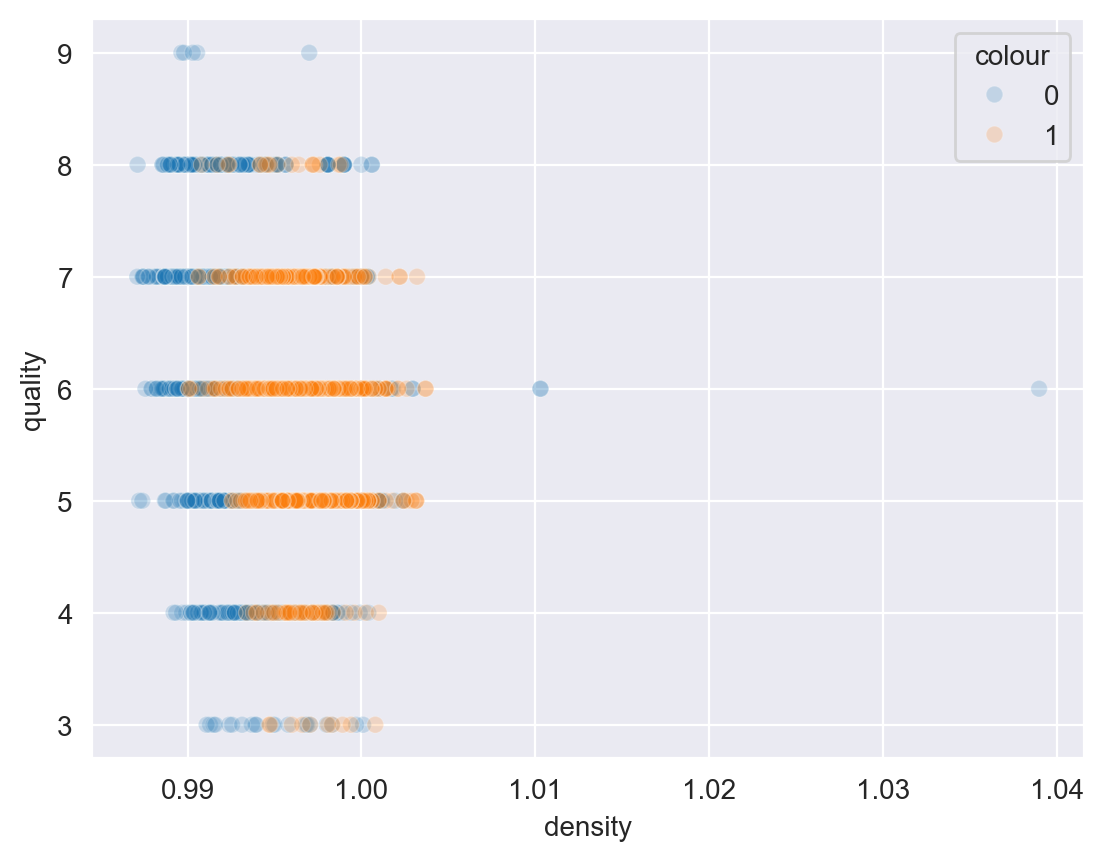

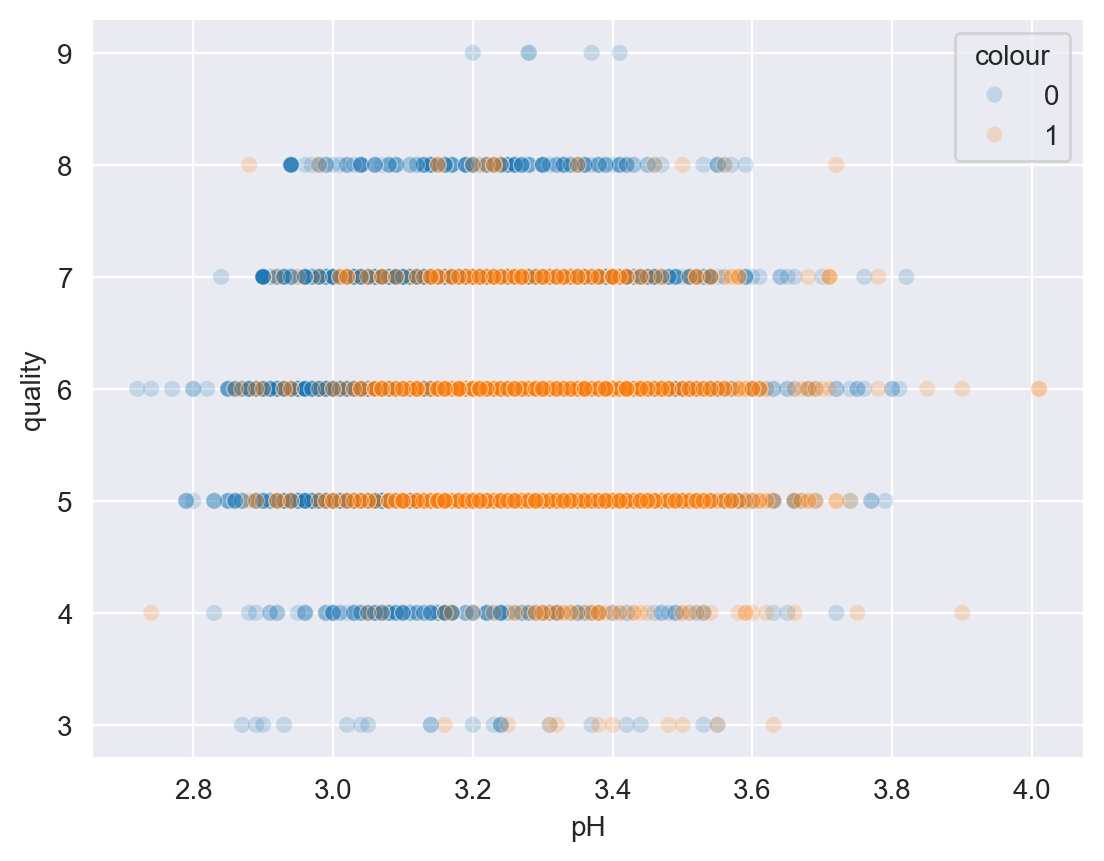

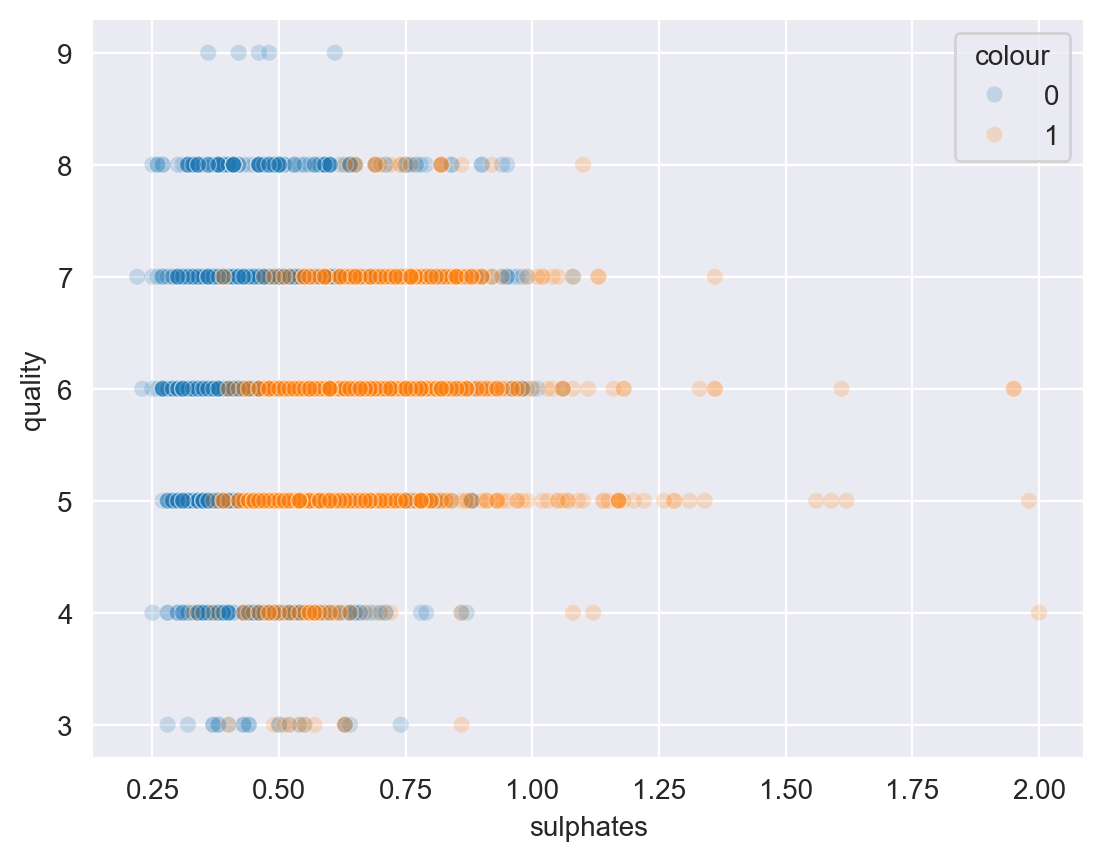

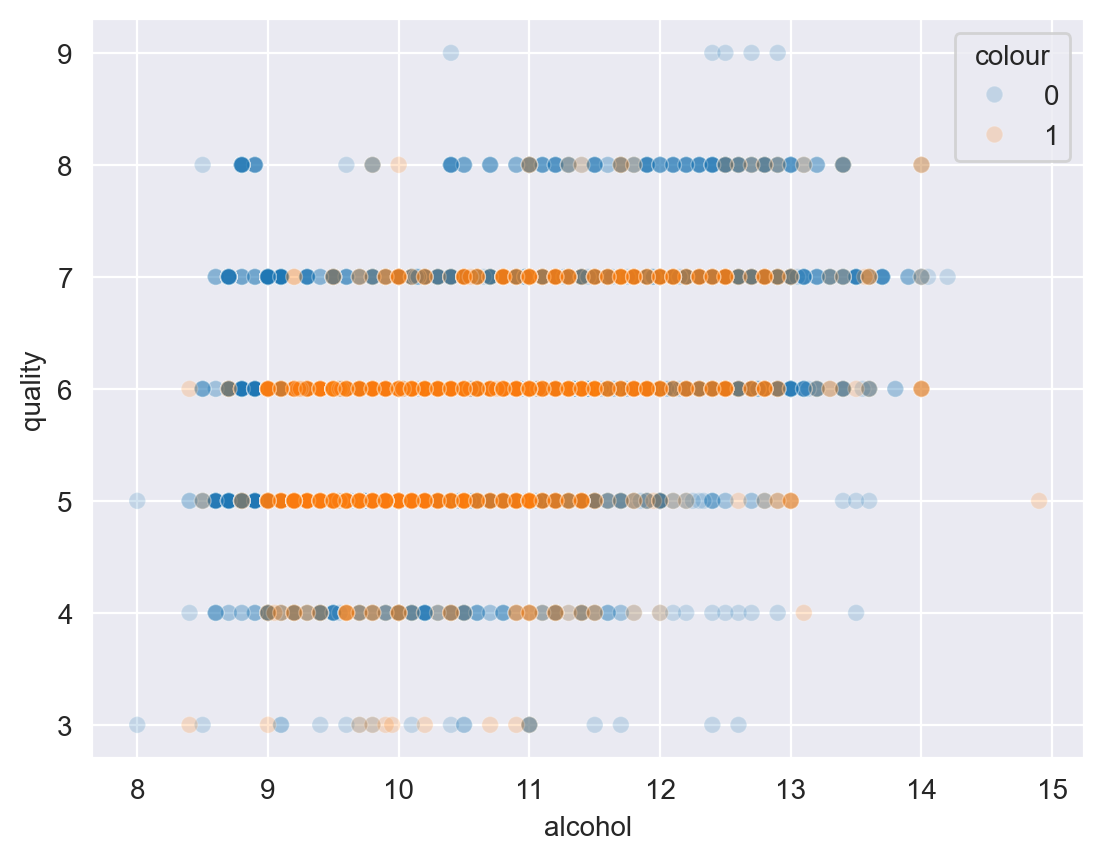

In [4]:
wine_data_all.columns.tolist()

for col in wine_data_all.columns.tolist()[:-2]:
    sns.scatterplot(data=wine_data_all,x=col,y="quality",hue="colour",alpha=0.2)
    plt.show()

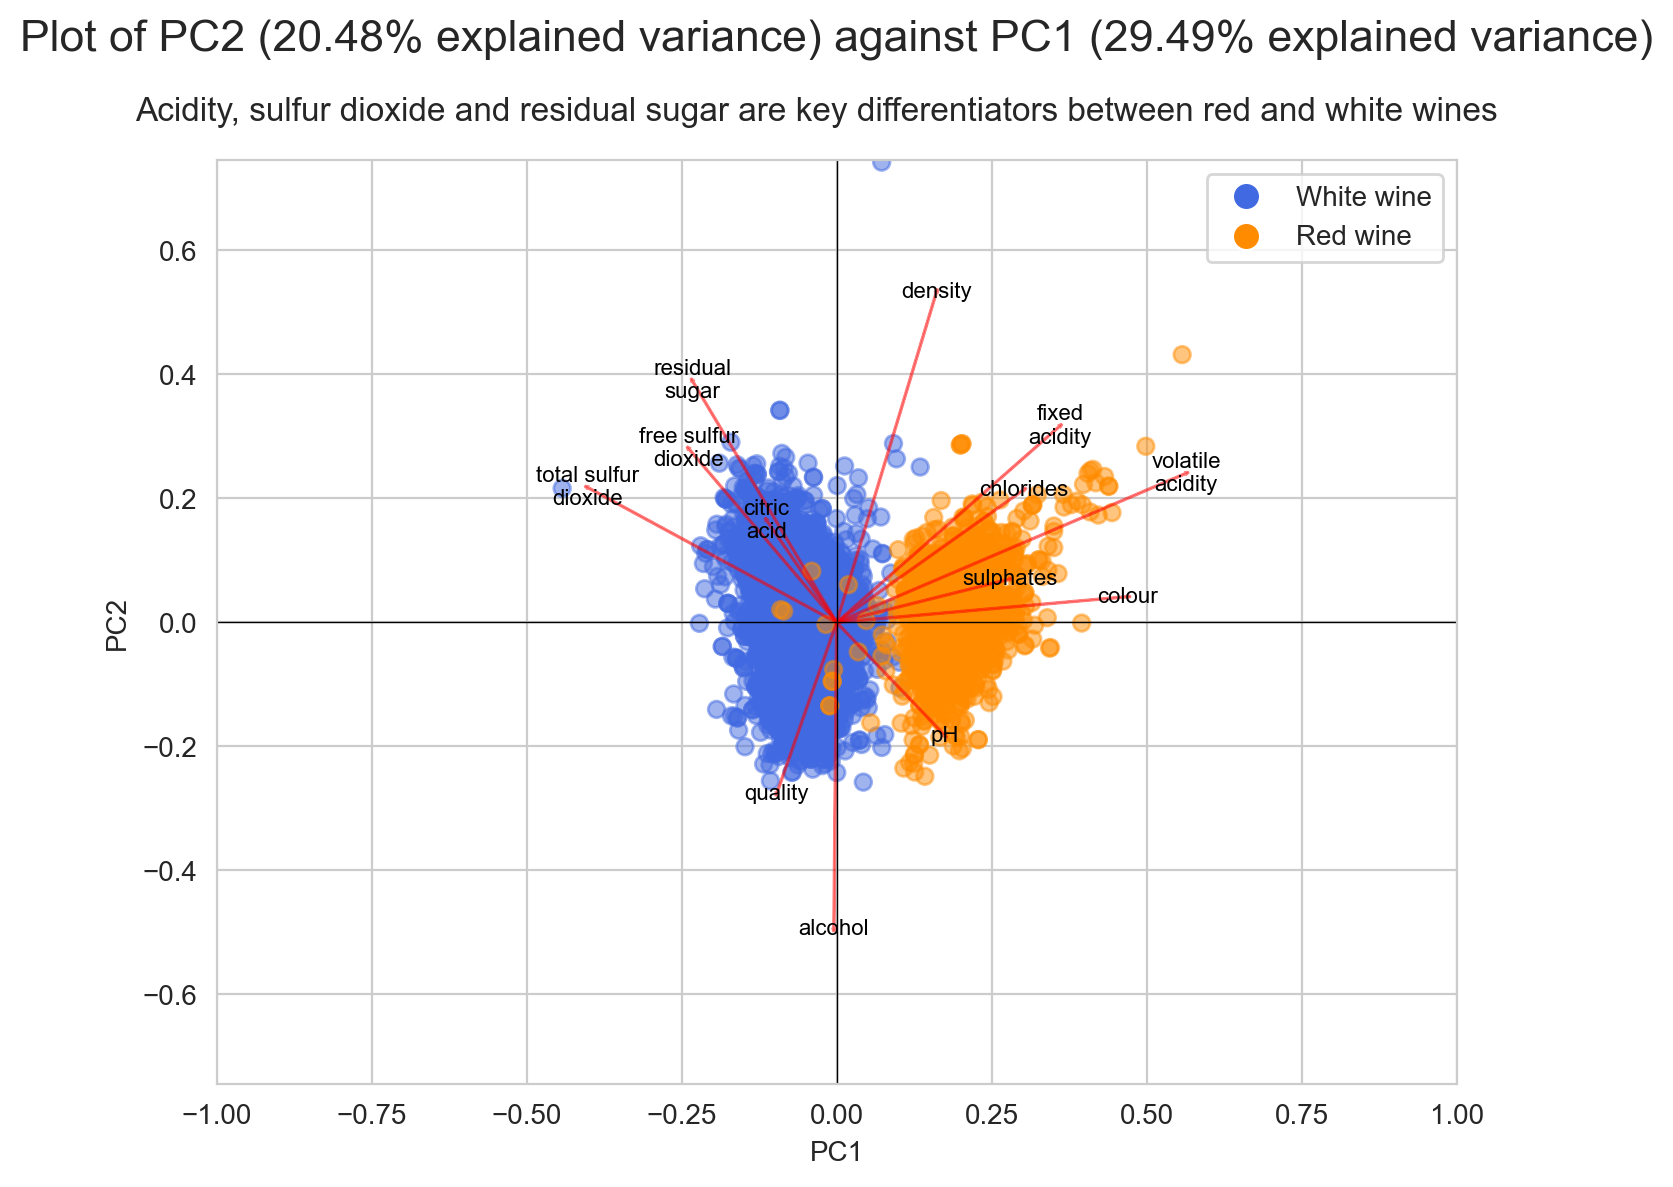

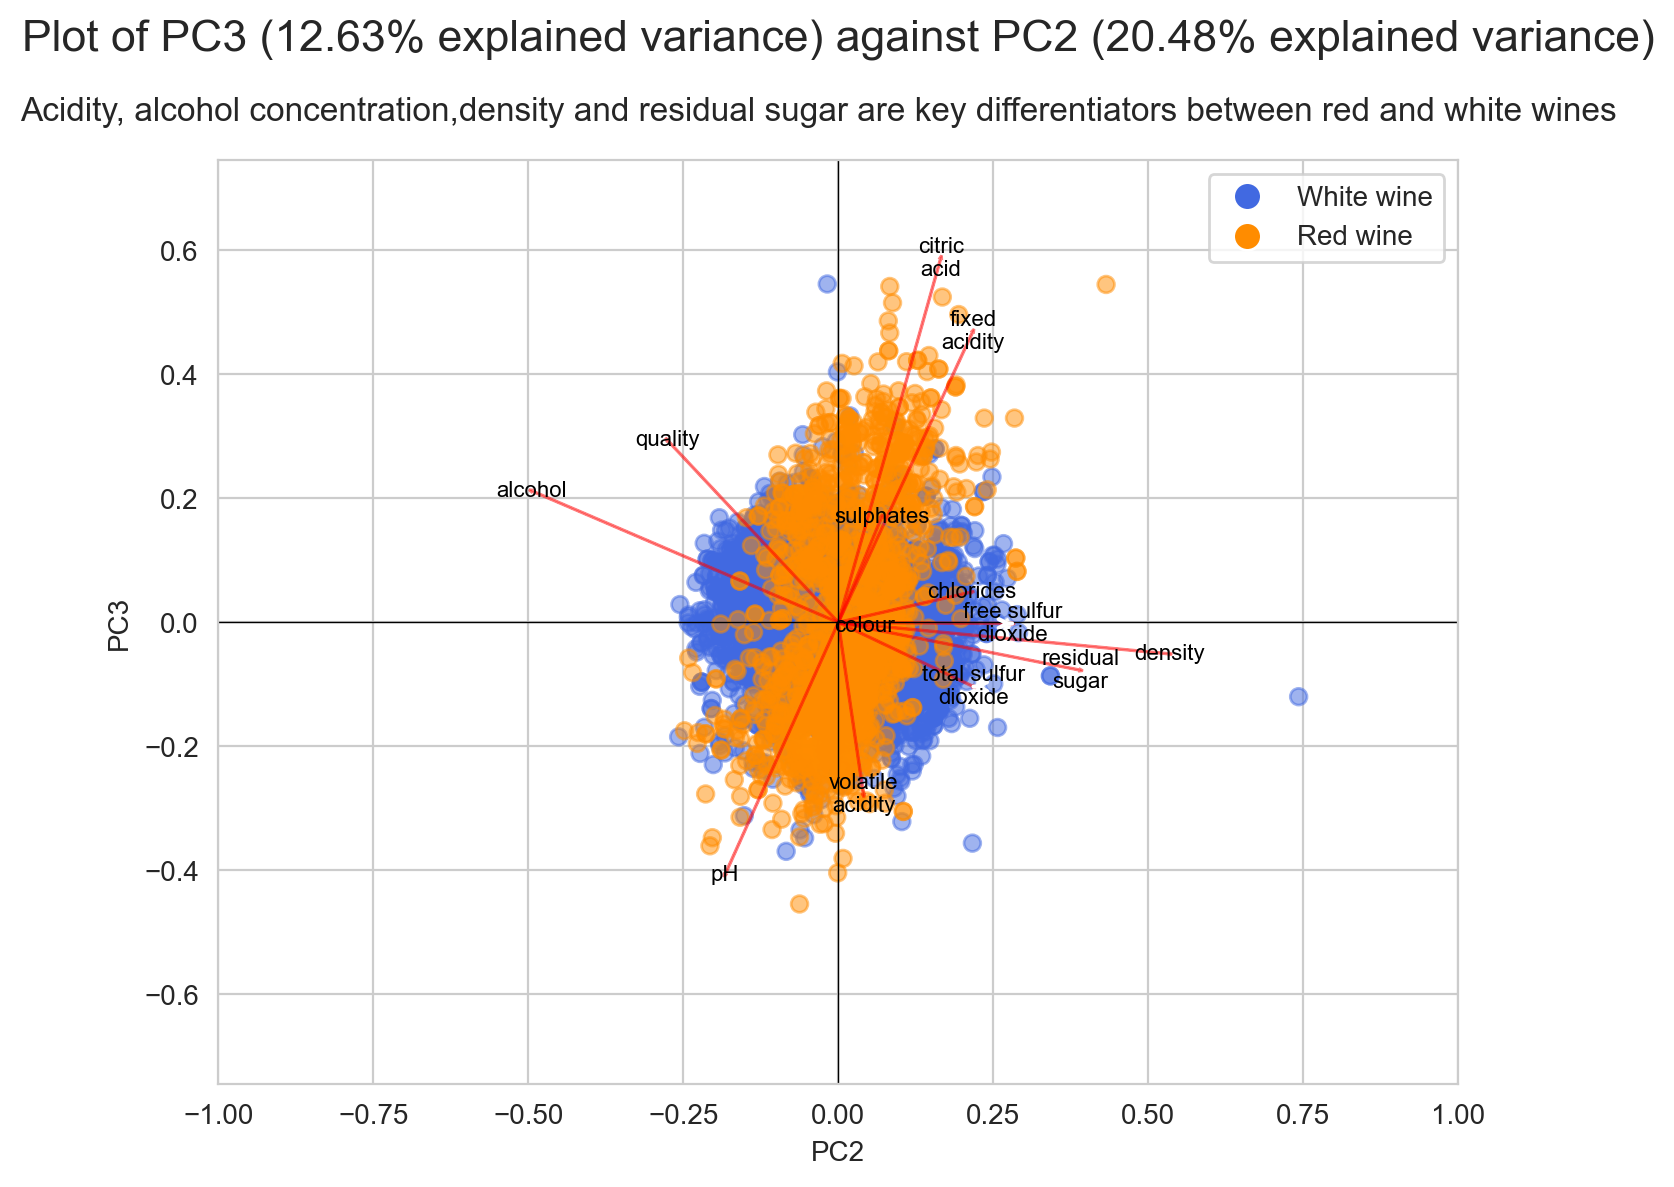

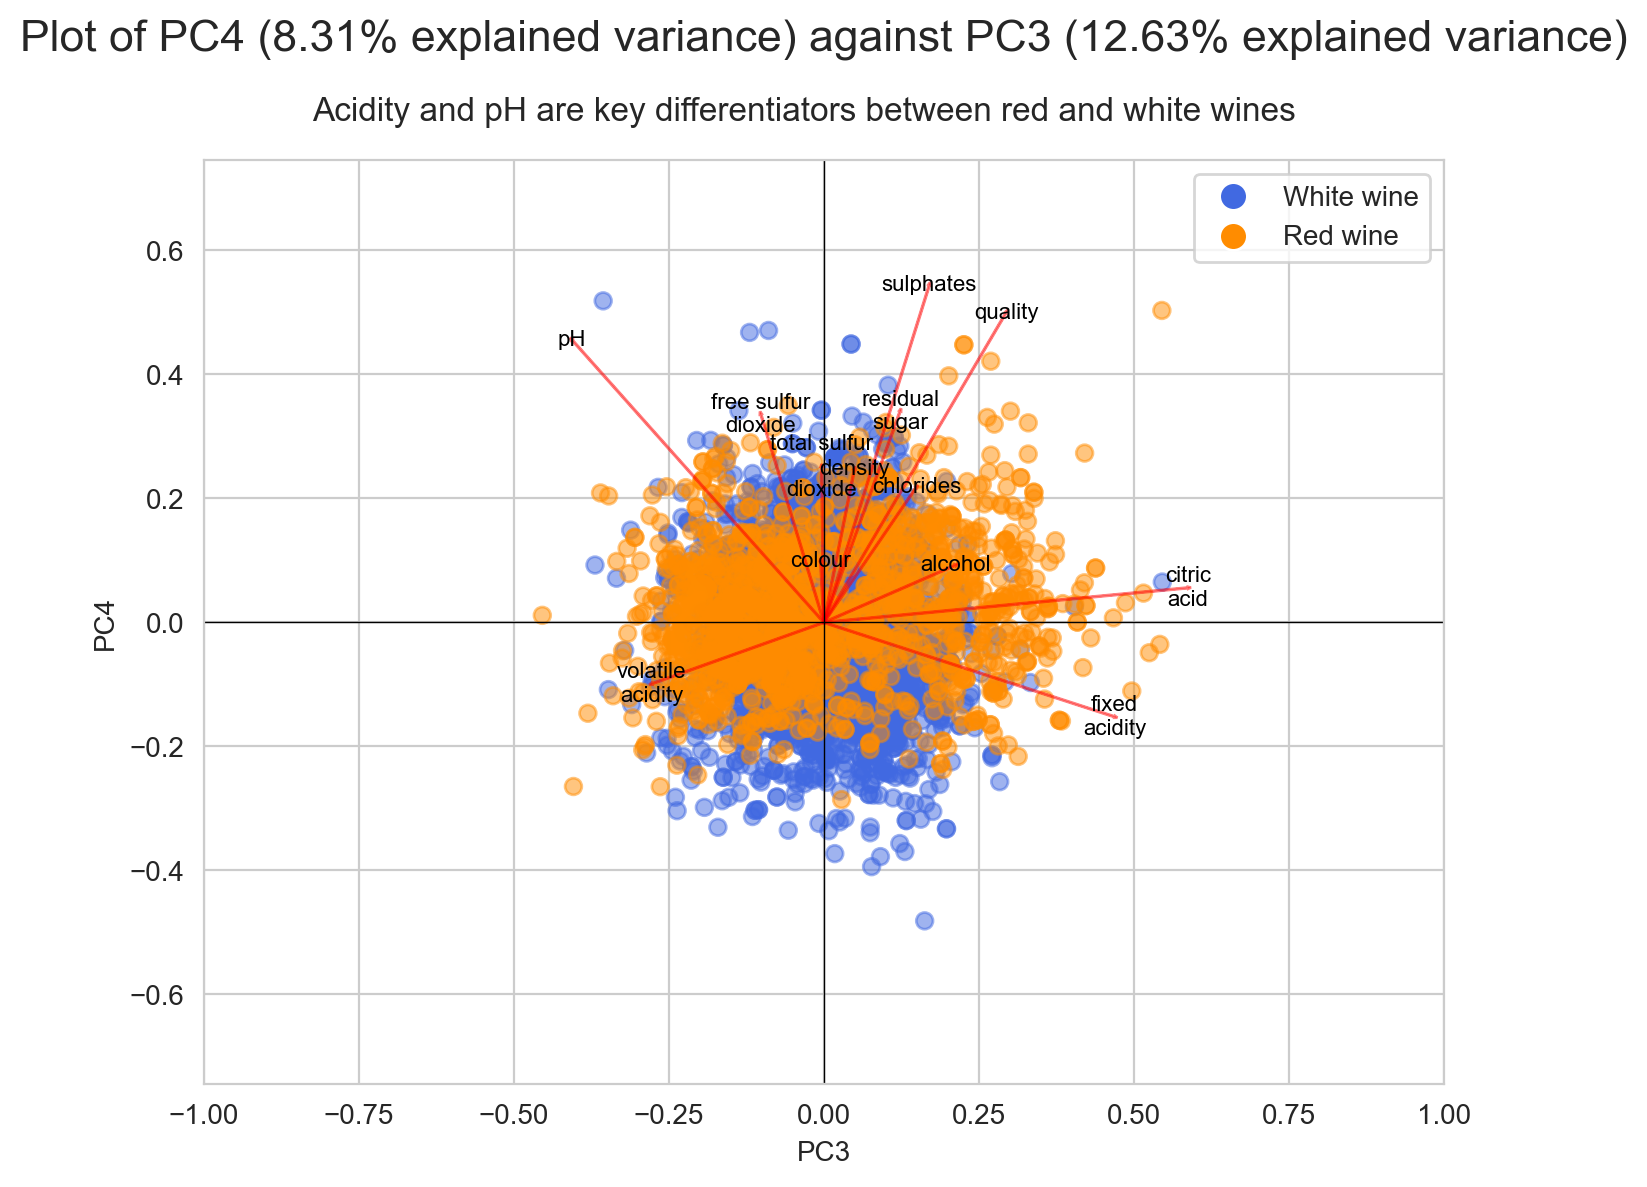

In [54]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# The following %config line changes the inline figures to have a higher DPI.
# You can comment out (#) this line if you don't have a high-DPI (~220) display.
%config InlineBackend.figure_format = 'retina'
plt.style.use('fast')

'''
A function to produce biplots for PCA components. Assumes data has already been fitted with a pipeline and is available as wine_data_all. Values for fit and pca are passed in because different scopes enforce the use of references and not modifying original fit
'''
def biplot_for_pca(pipeline_fit: object,pca_fit: PCA, pca_number_for_x_axis : int, pca_number_for_y_axis : int,plot_title: str,figure_file_name: str) -> None:
    fig, ax = plt.subplots(figsize=(8,6))
    ax.grid(True)
    plt.axis("equal")
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel(f"PC{pca_number_for_x_axis}")
    plt.ylabel(f"PC{pca_number_for_y_axis}")
    plt.title(plot_title, fontsize=16,y=1.1)
    
    # Extract transformed values from fit for x and y axes
    pca_data_index_x = pca_number_for_x_axis - 1
    pca_data_index_y = pca_number_for_y_axis - 1
    pca_data_x = pipeline_fit.transform(wine_data_all)[:,pca_data_index_x]
    pca_data_y = pipeline_fit.transform(wine_data_all)[:,pca_data_index_y]
    coeff = np.transpose(pca_fit.components_[pca_data_index_x:pca_number_for_y_axis,:])
    n=wine_data_all.shape[1]
    scale_x_axis = 1.0 / (pca_data_x.max() - pca_data_x.min())
    scale_y_axis = 1.0 / (pca_data_y.max() - pca_data_y.min())
    # Used for differentiating the wine type
    colour_mapping = {0: "royalblue", 1: "darkorange"}
    ax.scatter(x=pca_data_x*scale_x_axis,y=pca_data_y*scale_y_axis, c=wine_data_all['colour'].map(colour_mapping),alpha=0.5)
    # Generate the legend
    legend_labels = ["White wine", "Red wine"]
    # Make a point with no data, modifying it to display a legend
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colour_mapping[i], markersize=10) for i in range(2)]
    ax.legend(legend_handles, legend_labels, loc='upper right')
    for column_index in range(n):
        x_position = coeff[column_index, 0]
        y_position = coeff[column_index, 1]
    
        # Check if the label will overlap with others, and adjust position if needed
        if column_index < n - 1:
            for j in range(column_index + 1, n):
                if (abs(x_position - coeff[j, 0]) < 0.1) and (abs(y_position - coeff[j, 1]) < 0.1):
                    x_position += 0.1
                    y_position += 0.1
    
        label = wine_data_all.T.index[column_index]
    
        # Find the last space character and replace it with a newline
        last_space_index = label.rfind(" ")
        if last_space_index >= 0:
            # Add an extra new line for total sulfur dioxide so labels don't overlap
            if pca_number_for_y_axis == 4 and column_index == 6:
                label = label[:last_space_index] + "\n\n" + label[last_space_index+1:]
            label = label[:last_space_index] + "\n" + label[last_space_index+1:]
    
        ax.arrow(0, 0, x_position, y_position, color="r", alpha=0.5)
        # Add arrowheads to labels
        ax.annotate(label, (x_position, y_position), color="black",
                     arrowprops=dict(arrowstyle="->", lw=1.5),
                     fontsize=8, ha='center', va='center')

    ax.axhline(0, color='black', linewidth=0.5)  # Add horizontal line
    ax.axvline(0, color='black', linewidth=0.5)  # Add vertical line
    match pca_number_for_x_axis:
        case 1:
            plt.text(0.5, 0.92,"Acidity, sulfur dioxide and residual sugar are key differentiators between red and white wines",fontsize=12, ha='center', va='center', transform=plt.gcf().transFigure)
        case 2:
            plt.text(0.5, 0.92,"Acidity, alcohol concentration,density and residual sugar are key differentiators between red and white wines",fontsize=12, ha='center', va='center', transform=plt.gcf().transFigure)
        case 3:
            plt.text(0.5, 0.92,"Acidity and pH are key differentiators between red and white wines", fontsize=12, ha='center', va='center', transform=plt.gcf().transFigure)

    fig.savefig(figure_file_name, dpi=300, bbox_inches='tight')
# PCA numbers are between 1 and 4, so we just need range 1 to 3, with 4 being 3 + 1.    
explained_variance_percentage = ["{:.2%}".format(num) for num in pca.explained_variance_ratio_]
for pca_number in range(1,4):
    biplot_for_pca(fit, pca,pca_number,pca_number+1,f"Plot of PC{pca_number+1} ({explained_variance_percentage[pca_number]} explained variance) against PC{pca_number} ({explained_variance_percentage[pca_number-1]} explained variance)",f"pc{pca_number+1}_vs_pc{pca_number}")
    

In [6]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [19]:
wine_data_all.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'colour'],
      dtype='object')